**1. Import Library**

In [402]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

**2. Load Dataset**

In [403]:
df = pd.read_csv('student_performance_dataset.csv', delimiter=';')

**3. Eksplorasi Dataset**

In [404]:
# menampilkan 5 baris pertama
print(f"\nSample data:")
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
print(df.head())


Sample data:
  Student_ID  Gender  Study_Hours_per_Week        Attendance_Rate  Past_Exam_Scores Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  Final_Exam_Score Pass_Fail
0       S147    Male                    31  6.826.784.098.370.280                86              High School                     Yes                        Yes                63      Pass
1       S136    Male                    16  7.822.292.712.613.200                73                      PhD                      No                         No                50      Fail
2       S209  Female                    21  8.752.509.623.826.560                74                      PhD                     Yes                         No                55      Fail
3       S458  Female                    27  9.207.648.301.550.210                99                Bachelors                      No                         No                65      Pass
4       S078  Female                    37  9.

In [405]:
# Cek info data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  708 non-null    object
 1   Gender                      708 non-null    object
 2   Study_Hours_per_Week        708 non-null    int64 
 3   Attendance_Rate             708 non-null    object
 4   Past_Exam_Scores            708 non-null    int64 
 5   Parental_Education_Level    708 non-null    object
 6   Internet_Access_at_Home     708 non-null    object
 7   Extracurricular_Activities  708 non-null    object
 8   Final_Exam_Score            708 non-null    int64 
 9   Pass_Fail                   708 non-null    object
dtypes: int64(3), object(7)
memory usage: 55.4+ KB
None


In [406]:
# Statistik ringkasan
print(df.describe())

       Study_Hours_per_Week  Past_Exam_Scores  Final_Exam_Score
count            708.000000        708.000000        708.000000
mean              26.132768         77.871469         58.771186
std                8.877727         14.402739          6.705877
min               10.000000         50.000000         50.000000
25%               19.000000         65.000000         52.000000
50%               27.000000         79.000000         59.500000
75%               34.000000         91.000000         64.000000
max               39.000000        100.000000         77.000000


**4. Praposes Data**

In [407]:
# Hapus baris dengan missing values di kolom 'Pass_Fail'
df_clean = df.dropna(subset=['Pass_Fail']).copy()

In [408]:
# Hapus kolom Student_ID
df_clean = df_clean.drop('Student_ID', axis=1)
print(df_clean.head())

   Gender  Study_Hours_per_Week        Attendance_Rate  Past_Exam_Scores Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  Final_Exam_Score Pass_Fail
0    Male                    31  6.826.784.098.370.280                86              High School                     Yes                        Yes                63      Pass
1    Male                    16  7.822.292.712.613.200                73                      PhD                      No                         No                50      Fail
2  Female                    21  8.752.509.623.826.560                74                      PhD                     Yes                         No                55      Fail
3  Female                    27  9.207.648.301.550.210                99                Bachelors                      No                         No                65      Pass
4  Female                    37  9.865.551.746.350.520                63                  Masters                  

In [409]:
# Attendance_Rate: hilangkan titik, ubah jadi float lalu bagi 1e14 agar jadi persentase normal
df_clean['Attendance_Rate'] = df_clean['Attendance_Rate'].astype(str).str.replace('.', '', regex=False).astype(float)
df_clean['Attendance_Rate'] = df_clean['Attendance_Rate'] / 1e14 * 100


# Salin kolom asli dulu untuk referensi
df['Attendance_Original'] = df['Attendance_Rate']

# Langkah 1: Ubah ke string & hapus titik
df['Attendance_NoDot'] = df['Attendance_Original'].astype(str).str.replace('.', '', regex=False)

# Langkah 2: Ubah ke float
df['Attendance_Float'] = df['Attendance_NoDot'].astype(float)

# Langkah 3: Skala
df['Attendance_Scaled'] = df['Attendance_Float'] / 1e14 * 100

# Tampilkan beberapa baris untuk melihat hasilnya
print(df[['Attendance_Original', 'Attendance_NoDot', 'Attendance_Float', 'Attendance_Scaled']].head(10))


     Attendance_Original  Attendance_NoDot  Attendance_Float  Attendance_Scaled
0  6.826.784.098.370.280  6826784098370280      6.826784e+15        6826.784098
1  7.822.292.712.613.200  7822292712613200      7.822293e+15        7822.292713
2  8.752.509.623.826.560  8752509623826560      8.752510e+15        8752.509624
3  9.207.648.301.550.210  9207648301550210      9.207648e+15        9207.648302
4  9.865.551.746.350.520  9865551746350520      9.865552e+15        9865.551746
5  8.415.919.282.227.400  8415919282227400      8.415919e+15        8415.919282
6  8.938.949.443.572.460  8938949443572460      8.938949e+15        8938.949444
7  5.068.359.824.134.980  5068359824134980      5.068360e+15        5068.359824
8    808.631.856.048.646   808631856048646      8.086319e+14         808.631856
9  6.549.684.631.343.050  6549684631343050      6.549685e+15        6549.684631


In [410]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home',
                      'Extracurricular_Activities']

for col in categorical_columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le
    print(f"\nEncoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    print(f"\nDataframe setelah encoding kolom '{col}':")
    print(df_clean.head())   # tampilkan 5 baris pertama



Encoded Gender: {'Female': np.int64(0), 'Male': np.int64(1)}

Dataframe setelah encoding kolom 'Gender':
   Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  Final_Exam_Score Pass_Fail
0       1                    31      6826.784098                86              High School                     Yes                        Yes                63      Pass
1       1                    16      7822.292713                73                      PhD                      No                         No                50      Fail
2       0                    21      8752.509624                74                      PhD                     Yes                         No                55      Fail
3       0                    27      9207.648302                99                Bachelors                      No                         No                65      Pass
4       0                    37      98

In [411]:
# Encoding target variable
target_encoder = LabelEncoder()
df_clean['Pass_Fail'] = target_encoder.fit_transform(df_clean['Pass_Fail'])
print(f"Target encoding: {dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))}")

Target encoding: {'Fail': np.int64(0), 'Pass': np.int64(1)}


In [412]:
# Memisahkan fitur(x) dan target(y)
X = df_clean.drop('Pass_Fail', axis=1)
y = df_clean['Pass_Fail']

print("Fitur (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Fitur (X):
   Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  Parental_Education_Level  Internet_Access_at_Home  Extracurricular_Activities  Final_Exam_Score
0       1                    31      6826.784098                86                         1                        1                           1                63
1       1                    16      7822.292713                73                         3                        0                           0                50
2       0                    21      8752.509624                74                         3                        1                           0                55
3       0                    27      9207.648302                99                         0                        0                           0                65
4       0                    37      9865.551746                63                         2                        0                           1                70

Targ

Visualisasi

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'Gender'),
  Text(0, 1.5, 'Study_Hours_per_Week'),
  Text(0, 2.5, 'Attendance_Rate'),
  Text(0, 3.5, 'Past_Exam_Scores'),
  Text(0, 4.5, 'Parental_Education_Level'),
  Text(0, 5.5, 'Internet_Access_at_Home'),
  Text(0, 6.5, 'Extracurricular_Activities'),
  Text(0, 7.5, 'Final_Exam_Score'),
  Text(0, 8.5, 'Pass_Fail')])

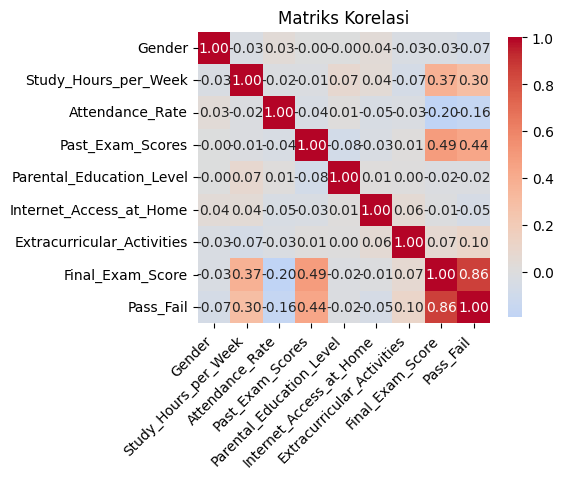

In [413]:
# Heatmap korelasi
plt.figure(figsize=(16,10))
plt.subplot(2,3,5)
# Ambil hanya kolom numerik
numeric_df = df_clean.select_dtypes(include=[np.number])

# Hitung korelasi
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, cbar_kws={'shrink': 0.8})
plt.title('Matriks Korelasi')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

In [414]:
# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (566, 8)
Test set: (142, 8)


In [415]:
# Standarisasi fitur agar skala data seragam
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [416]:
print("=== JST (Jaringan Saraf Tiruan) ===")

# 1️⃣ Membuat model
jst = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='logistic',
    solver='adam',
    max_iter=1000,
    random_state=42
)
print("\nModel JST dibuat dengan 1 hidden layer (10 neuron) dan aktivasi logistic.")

# 2️⃣ Melatih model
jst.fit(X_train_scaled, y_train)
print("\nModel selesai dilatih pada data training.")

# 3️⃣ Prediksi data test
jst_pred = jst.predict(X_test_scaled)
print("\nPrediksi data test selesai.")
print(f"Contoh hasil prediksi (5 data pertama): {jst_pred[:5]}")

# 4️⃣ Bandingkan dengan label sebenarnya
print(f"\nHasil 5 label sebenarnya (y_test): {jst_pred[:5]}")

# 5️⃣ Hitung akurasi
jst_acc = accuracy_score(y_test, jst_pred)
print(f"\nAkurasi JST Tradisional: {jst_acc:.4f}")


=== JST (Jaringan Saraf Tiruan) ===

Model JST dibuat dengan 1 hidden layer (10 neuron) dan aktivasi logistic.

Model selesai dilatih pada data training.

Prediksi data test selesai.
Contoh hasil prediksi (5 data pertama): [0 0 1 1 1]

Hasil 5 label sebenarnya (y_test): [0 0 1 1 1]

Akurasi JST Tradisional: 1.0000


In [417]:
print("\n=== MEMBUAT MODEL DEEP LEARNING ===")
dl = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
print("Model berhasil dibuat:")
dl.summary()  # menampilkan arsitektur model

print("\n=== KOMPILASI MODEL ===")
dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Model dikompilasi dengan optimizer=adam dan loss=binary_crossentropy.")

print("\n=== TRAINING MODEL ===")
history = dl.fit(
    X_train_scaled, y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    verbose=1
)
print("\nTraining selesai!")

print("\n=== PREDIKSI DATA TEST ===")
probabilities = dl.predict(X_test_scaled)
print("5 probabilitas pertama:", probabilities[:5].flatten())

dl_pred = (probabilities > 0.5).astype(int).flatten()
print("5 prediksi kelas pertama:", dl_pred[:5])

print("\n=== MENGHITUNG AKURASI ===")
dl_acc = accuracy_score(y_test, dl_pred)
print(f"Akurasi Deep Learning: {dl_acc:.4f}")

print("\n=== LABEL SEBENARNYA ===")
print("5 label sebenarnya:", y_test[:5])


=== MEMBUAT MODEL DEEP LEARNING ===
Model berhasil dibuat:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)


=== KOMPILASI MODEL ===
Model dikompilasi dengan optimizer=adam dan loss=binary_crossentropy.

=== TRAINING MODEL ===
Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5029 - loss: 0.7144 - val_accuracy: 0.6140 - val_loss: 0.6408
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5967 - loss: 0.6450 - val_accuracy: 0.8333 - val_loss: 0.5692
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7218 - loss: 0.5855 - val_accuracy: 0.8684 - val_loss: 0.5002
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8101 - loss: 0.5240 - val_accuracy: 0.8947 - val_loss: 0.4295
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8526 - loss: 0.4673 - val_accuracy: 0.9035 - val_loss: 0.3649
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8775 - loss: 0.4057 - val_accuracy: 0.9211 - val_loss: 0.3053
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8802 - loss: 0.3497 - val_accuracy: 0.9474 - val_loss: 0.251

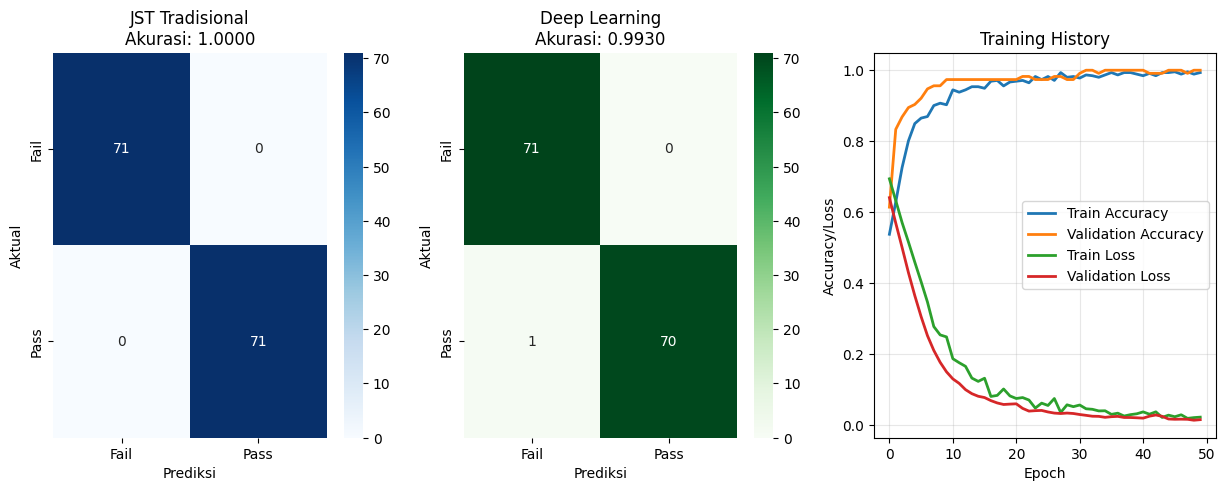

In [418]:
# === PERBANDINGAN & VISUALISASI ===
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Confusion Matrix JST
cm_jst = confusion_matrix(y_test, jst_pred)
sns.heatmap(cm_jst, annot=True, fmt='d', ax=axes[0], cmap='Blues',
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
axes[0].set_title(f'JST Tradisional\nAkurasi: {jst_acc:.4f}')
axes[0].set_xlabel('Prediksi')
axes[0].set_ylabel('Aktual')

# Confusion Matrix Deep Learning
cm_dl = confusion_matrix(y_test, dl_pred)
sns.heatmap(cm_dl, annot=True, fmt='d', ax=axes[1], cmap='Greens',
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
axes[1].set_title(f'Deep Learning\nAkurasi: {dl_acc:.4f}')
axes[1].set_xlabel('Prediksi')
axes[1].set_ylabel('Aktual')

# Training History
axes[2].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[2].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[2].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[2].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Accuracy/Loss')
axes[2].legend()
axes[2].set_title('Training History')
axes[2].grid(True, alpha=0.3)


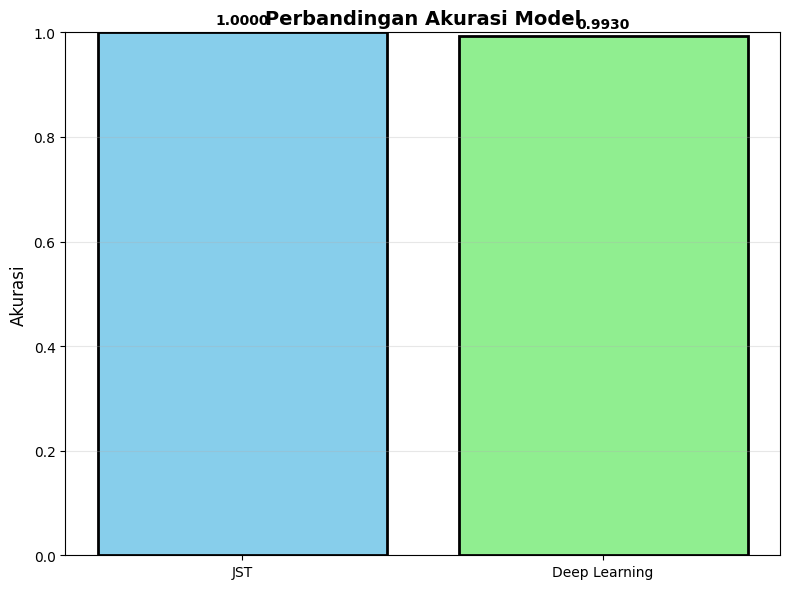

In [419]:
# Grafik perbandingan akurasi
plt.figure(figsize=(8, 6))
models = ['JST', 'Deep Learning']
accuracies = [jst_acc, dl_acc]
colors = ['skyblue', 'lightgreen']
bars = plt.bar(models, accuracies, color=colors, edgecolor='black', linewidth=2)
plt.title('Perbandingan Akurasi Model', fontsize=14, fontweight='bold')
plt.ylabel('Akurasi', fontsize=12)
plt.ylim(0, 1)
# Tambahkan label nilai pada bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [420]:
# Classification report
print("\n=== Classification Report JST ===")
print(classification_report(y_test, jst_pred))
print("\n=== Classification Report Deep Learning ===")
print(classification_report(y_test, dl_pred))


=== Classification Report JST ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        71

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142


=== Classification Report Deep Learning ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.99      0.99        71

    accuracy                           0.99       142
   macro avg       0.99      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142

